In [23]:
#1.- importar datos
import pandas as pd
kyphosis_df = pd.read_csv('kyphosis.csv')
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [ ]:
#2.- Analisis EDA basico de datos
print("Tipos de datos: ")
kyphosis_df.info() #información tecnica de datos
print("\n")
print("Distribución de datos: ")
kyphosis_df.describe() #información de datos

Tipos de datos: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


Distribución de datos: 


,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
#3.-Enumerar la edad media, mínima y máxima (en años) considerada en este estudio utilizando 2 métodos
print("Enumerar la edad media, mínima y máxima (en años) considerada en este estudio utilizando 2 métodos")
print(" \n Método 1")
kyph_age = (kyphosis_df['Age']/12).round(2)
print(f"Edad media: ",kyph_age.mean().round(2))
print(f"Edad minima: ",kyph_age.min())
print(f"Edad máxima: ",kyph_age.max())
print("\n Método 2")
kyph_age.describe()

Enumerar la edad media, mínima y máxima (en años) considerada en este estudio utilizando 2 métodos
 
 Método 1
Edad media:  6.97
Edad minima:  0.08
Edad máxima:  17.17

 Método 2


,Age
count,81.000000
mean,6.970864
std,4.841913
min,0.080000
25%,2.170000
50%,7.250000
75%,10.830000
max,17.170000


    Age  Number  Start  Kyphosis_absent  Kyphosis_present
0    71       3      5                1                 0
1   158       3     14                1                 0
2   128       4      5                0                 1
3     2       5      1                1                 0
4     1       4     15                1                 0
..  ...     ...    ...              ...               ...
76  157       3     13                0                 1
77   26       7     13                1                 0
78  120       2     13                1                 0
79   42       7      6                0                 1
80   36       4     13                1                 0

[81 rows x 5 columns]


<Axes: >

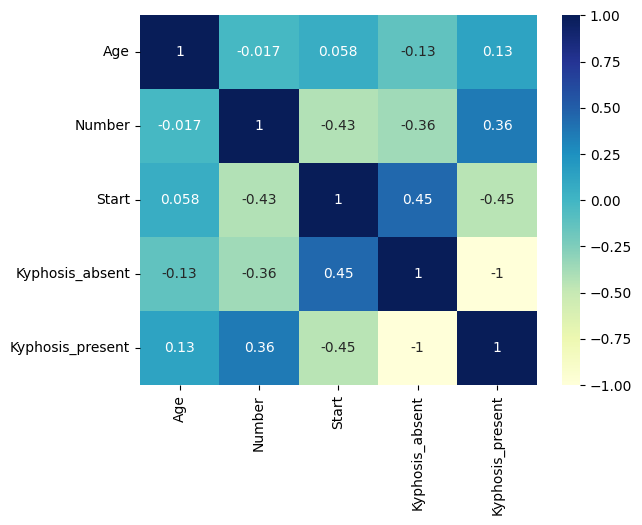

In [24]:
#4.- Representar la matriz de correlaciones
import matplotlib.pyplot as plt
import seaborn as sns
#Se realiza una transformación One-Hot Encoding a la columna Kyphosis
kyphosis_df['Kyphosis'].unique()
kyphosis_with_dummies_df = pd.get_dummies(kyphosis_df,columns=['Kyphosis'], prefix='Kyphosis', dtype=int)
print(kyphosis_with_dummies_df)
#Matriz de correlación
correlations = kyphosis_with_dummies_df.corr()
sns.heatmap(correlations, annot=True, cmap='YlGnBu')


In [22]:
#5.- Convierte el tipo de datos de la columna edad de int64 a float64
kyphosis_df=kyphosis_df.astype({'Age':'float64'})
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kyphosis  81 non-null     object 
 1   Age       81 non-null     float64
 2   Number    81 non-null     int64  
 3   Start     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


In [4]:
#6.- Definir una función que convierta la edad de meses a años
def age_month_to_year(num_month: int):
  anios = num_month//12
  return anios

#Aplicar la función a la columna "Edad" y añadir los resultados en una nueva columna titulada "Edad en años"
kyphosis_df['Age_Year'] = kyphosis_df['Age'].apply(age_month_to_year)

kyphosis_df


,Kyphosis,Age,Number,Start,Age_Year
0,absent,71,3,5,5
1,absent,158,3,14,13
2,present,128,4,5,10
3,absent,2,5,1,0
4,absent,1,4,15,0
...,...,...,...,...,...
76,present,157,3,13,13
77,absent,26,7,13,2
78,absent,120,2,13,10
79,present,42,7,6,3


In [9]:
kyphosis_df.describe()

,Age,Number,Start,Age_Year
count,81.000000,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827,6.530864
std,58.104251,1.619423,4.883962,4.809071
min,1.000000,2.000000,1.000000,0.000000
25%,26.000000,3.000000,9.000000,2.000000
50%,87.000000,4.000000,13.000000,7.000000
75%,130.000000,5.000000,16.000000,10.000000
max,206.000000,10.000000,18.000000,17.000000


In [21]:
# 8.- Cuáles son las características del niño mayor y del menor de este estudio?
kyphosis_df.describe()
min_age = kyphosis_df["Age"].min()
kyphosis_df_age_min = kyphosis_df[kyphosis_df['Age']==min_age]
kyphosis_df_age_min
max_age = kyphosis_df["Age"].max()
kyphosis_df_age_max = kyphosis_df[kyphosis_df['Age']==max_age]
kyphosis_df_age_max

# Caracteristicas del niño menor:
# - Tienen una edad de 1 mes
# - Existen 5 niños con la misma edad
# - El total  de vertebras afectadas varian entre 2 y 4
# - Las primeras vertebras operadas varian entre la número 9,12,15 y 16
# - En estos casos despues de la operación los niños no presentaron una cifosis

# Caracteristicas del niño mayor:
# - Tiene una edad de 17 años
# - El total de vertebras afectadas fueron 4
# - La primera vertebra operada fue la número 10
# - En este caso despues de la operación el niño no presento una cifosis


,Kyphosis,Age,Number,Start
73,absent,206,4,10


In [19]:
#9.- Escala la columna "Edad" sin procesar (en meses) utilizando tanto la estandarización como la normalización.
# Realice una comprobación de sanidad.

# ----------- Normalización -------------------
kyphosis_df = pd.read_csv('kyphosis.csv')
kyphosis_df['Age'].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kyphosis_df['Age'] = scaler.fit_transform(kyphosis_df['Age'].values.reshape(-1,1))
kyphosis_df.describe().round(2)

,Age,Number,Start
count,81.00,81.00,81.00
mean,0.40,4.05,11.49
std,0.28,1.62,4.88
min,0.00,2.00,1.00
25%,0.12,3.00,9.00
50%,0.42,4.00,13.00
75%,0.63,5.00,16.00
max,1.00,10.00,18.00


In [18]:
# ----------- Estandarización -------------------
kyphosis_df = pd.read_csv('kyphosis.csv')
kyphosis_df['Age'].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kyphosis_df['Age'] = scaler.fit_transform(kyphosis_df['Age'].values.reshape(-1,1))
kyphosis_df.describe().round(2)

,Age,Number,Start
count,81.00,81.00,81.00
mean,0.00,4.05,11.49
std,1.01,1.62,4.88
min,-1.43,2.00,1.00
25%,-1.00,3.00,9.00
50%,0.06,4.00,13.00
75%,0.80,5.00,16.00
max,2.12,10.00,18.00
